In [0]:
from fastai import*
from fastai.vision import *

In [0]:
folder = 'gtr'
file = 'gtr.csv'

In [0]:
folder = 'civic'
file = 'civic.csv'

In [0]:
folder = '370z'
file = '370z.csv'

In [0]:
path = Path('./')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [29]:
from google.colab import files
uploaded = files.upload()

Saving 370z.csv to 370z.csv
Saving civic.csv to civic.csv
Saving gtr.csv to gtr.csv


In [0]:
download_images(path/file, dest, max_pics=500)

In [0]:
rm -r *

In [0]:
classes = ['gtr','civic','370z']

In [0]:
for c in classes:
  print(c)
  verify_images(path/c, delte=True, max_workers=8)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [21]:
data.classes

['370z', 'civic', 'gtr']

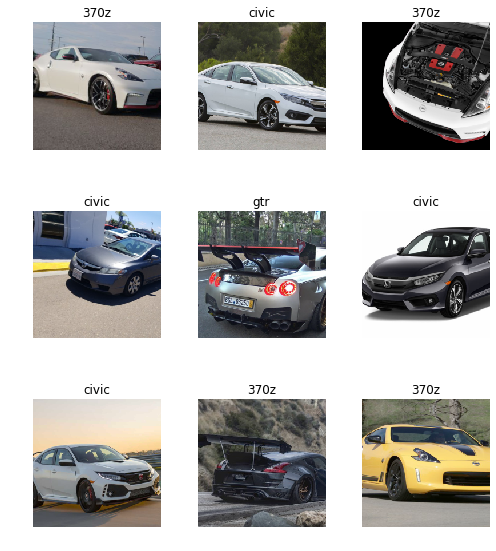

In [39]:
data.show_batch(rows=3, figsize=(7,8))

In [40]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['370z', 'civic', 'gtr'], 3, 231, 57)

In [42]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [43]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.491336,1.159611,0.631579,00:12
1,1.285070,0.937978,0.456140,00:12
2,1.045837,0.912800,0.473684,00:13
3,0.893914,0.861830,0.403509,00:13


In [0]:
learn.unfreeze()

In [45]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


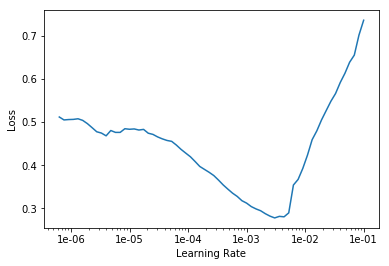

In [47]:
learn.recorder.plot()

In [50]:
learn.fit_one_cycle(6, max_lr=slice(3e-5,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.233761,0.628390,0.228070,00:11
1,0.211922,0.546653,0.122807,00:13
2,0.180587,0.521328,0.087719,00:14
3,0.151343,0.449993,0.105263,00:13
4,0.128781,0.441906,0.122807,00:14
5,0.116909,0.407097,0.140351,00:14


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

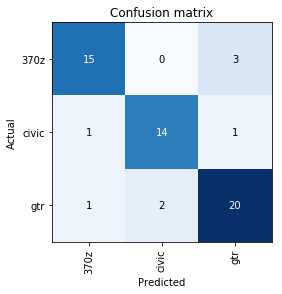

In [52]:
interp.plot_confusion_matrix()
